# Democracy and Economic Well-Being

## My Research Question & Hypothesis

For this research project I will be exploring what is the relationship between the level of openness of a society and the economic well-being of the citizens. My hypothesis is that countries with a more open society will have a higher level of economic well-being.

## Data Used

The data I will be using is a subset of the Gapminder Project’s data. This section will describe the data in more detail:

### Economic Well-Being
In order to measure the economic well-being I will be using GDP per capita data.  This originally came from the World Bank.  It is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.  The data are in constant 2000 US Dollars.  The GapMinder data set that I will be analyzing is the 2010 GDP per capita.

### Level of Openness
In order to measure the level of openness of a society I will be using the democracy score as a proxy.  The more democratic a society is, the more open it is.  The democracy score comes from the Polity IV project.  It is a summary measure of a country's democratic and free nature. -10 is the lowest value, 10 the highest.  The GapMinder data set that I will analyzing is the polity score for 2009.  To get a feel for this data take a look at the following figure provided by the Polity IV project authors:

![polity categories](http://www.systemicpeace.org/polity/demmap13.jpg)

## Week 2 Assignment
For this week's assignment I will investigate the relationship between a country's level of openess and their presense in the top quartile in terms of economic well-being.  I will preform chi square tests of independence on these two categorical variables.

## Data Mangement
I begin by importing the libraries needed for the analysis:

In [1]:
%matplotlib inline
# Import libraries needed
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

Now I have python parse the csv file and print out some basic statistics about the data frame (df):

In [2]:
# Read in the GapMinder Data
print('Reading in GapMinder data')
df = pd.read_csv('gapminder.csv', low_memory=False)
# Print some basic statistics about the GapMinder data
print('Number of observations: '+ str(len(df)) +' (rows)')
print('Number of variables: '+ str(len(df.columns)) +' (columns)')

Reading in GapMinder data
Number of observations: 213 (rows)
Number of variables: 16 (columns)


There are 213 observations with 16 variables in the data frame.  I will change the data type:

In [3]:
# Change the data type for variables of interest
df['polityscore'] = df['polityscore'].convert_objects(convert_numeric=True)
df['incomeperperson'] = df['incomeperperson'].convert_objects(convert_numeric=True)

I need to have a complete set of data for the variables of interest so I will subset the data frame:

In [4]:
# Get the rows not missing a value
print('Dropping rows with missing democracy score and per capita GDP')
subset = df[np.isfinite(df['polityscore'])]
subset = subset[np.isfinite(subset['incomeperperson'])]
print('Number of observations: '+ str(len(subset)) +' (rows)')
print('Number of variables: '+ str(len(subset.columns)) +' (columns)')

Dropping rows with missing democracy score and per capita GDP
Number of observations: 155 (rows)
Number of variables: 16 (columns)


155 of the 213 records have complete data.  Now I will drop the unneeded variables:

In [5]:
# Drop unneeded columns
print('Dropping unneeded variables')
drops = ['country', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate']
subset.drop(drops,inplace=True,axis=1)
# Print more statistics
print('Number of observations: '+ str(len(subset)) +' (rows)')
print('Number of variables: '+ str(len(subset.columns)) +' (columns)')

Dropping unneeded variables
Number of observations: 155 (rows)
Number of variables: 2 (columns)


### Level of Openness
Now I will create my new variable for the democracy score categories.  I will do this by defining a function and then using that function to create the new variable:

In [6]:
# This function converts the polity score to a category
def convert_polityscore_to_category(score):
    if score == 10:
        return('1 - Full Democracy')
    elif score > 5:
        return('2 - Democracy')
    elif score > 0:
        return ('3 - Open Anocracy')
    elif score > -6:
        return ('4 - Closed Anocracy')
    else:
        return('5 - Autocracy')

# Now we can use the function to create the new variable
subset['openness'] = subset['polityscore'].apply(convert_polityscore_to_category)
subset['openness'] = subset['openness'].astype('category')

I want to visualize the results so:

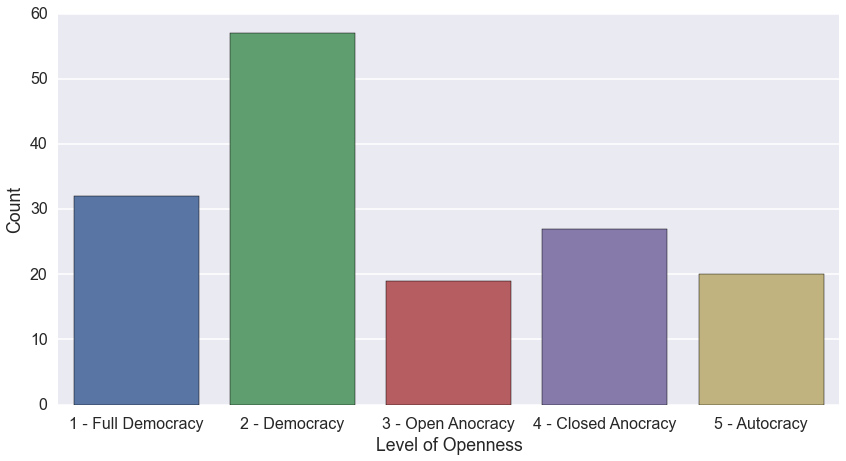

In [7]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='openness', data=subset)
plt.ylabel('Count')
plt.xlabel('Level of Openness')

In [8]:
openness_counts = subset.groupby('openness').size()
print('The Number of Countries by Openness')
print(openness_counts)

The Number of Countries by Openness
openness
1 - Full Democracy     32
2 - Democracy          57
3 - Open Anocracy      19
4 - Closed Anocracy    27
5 - Autocracy          20
dtype: int64


### Economic Well-Being
I also need to make a change to the GDP per capita.  Since GDP per person is a continuous varible I will need to create a discrete one:

In [9]:
# Create per capita GDP quartiles
print('Creating GDP per capita quartiles and top quartile flag')
subset['incomequartiles'] = pd.cut(subset['incomeperperson'], 4, labels=['1 -  0% to 25%','2 - 25% to 50%','3 - 50% to 75%','4 - 75% to 100%'])
subset['incomequartiles'] = subset['incomequartiles'].astype('category')

Creating GDP per capita quartiles and top quartile flag


Now to visualize the results:

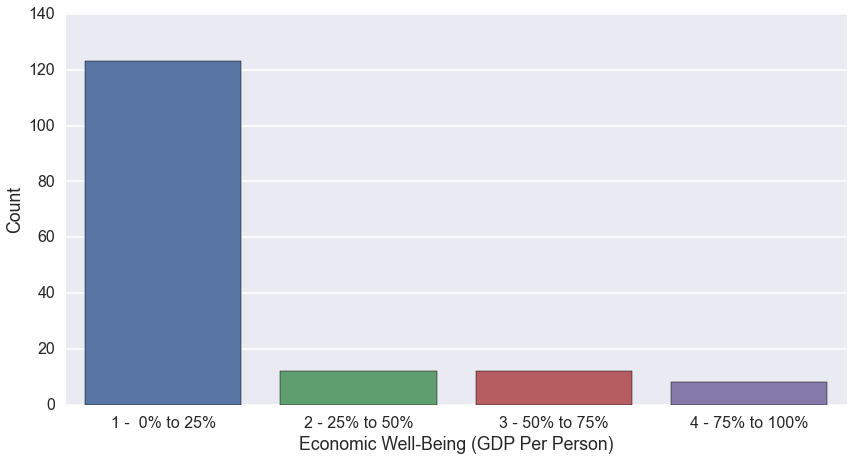

In [10]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='incomequartiles', data=subset)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GDP Per Person)')

In [11]:
income_quartile_counts = subset.groupby('incomequartiles').size()
print(income_quartile_counts)

incomequartiles
1 -  0% to 25%     123
2 - 25% to 50%      12
3 - 50% to 75%      12
4 - 75% to 100%      8
dtype: int64


For this week's assignment I need to create a categorical variable that rolls this up into two categories.  Initially I was going to do the top quartile but since there are only 8 observations I will use in the top half:

In [12]:
subset['top half'] = pd.cut(subset['incomeperperson'], 4, labels=['1','2','3','4'])
recode_map = {'1':'No','2':'No','3':'Yes','4':'Yes'}
subset['top half'] = subset['top half'].map(recode_map).astype('category')
print('Number of observations: '+ str(len(subset)) +' (rows)')
print('Number of variables: '+ str(len(subset.columns)) +' (columns)')

Number of observations: 155 (rows)
Number of variables: 5 (columns)


## Chi Square
With the data management complete I am ready to conduct a test of independence between a country's level of openness and their presense in the top half of economic well-being.  So first I will create a contingency table:


In [13]:
crosstab = pd.crosstab(subset['top half'],subset['openness'])
print(crosstab)

openness  1 - Full Democracy  2 - Democracy  3 - Open Anocracy  \
top half                                                         
No                        17             55                 19   
Yes                       15              2                  0   

openness  4 - Closed Anocracy  5 - Autocracy  
top half                                      
No                         26             18  
Yes                         1              2  


Next I will display it on a percentage basis:

In [14]:
column_sums = crosstab.sum(axis=0)
column_percents = crosstab / column_sums
print(column_percents)

openness  1 - Full Democracy  2 - Democracy  3 - Open Anocracy  \
top half                                                         
No                   0.53125       0.964912                  1   
Yes                  0.46875       0.035088                  0   

openness  4 - Closed Anocracy  5 - Autocracy  
top half                                      
No                   0.962963            0.9  
Yes                  0.037037            0.1  


Now I can calculate the chi square:

In [15]:
chi2 = scipy.stats.chi2_contingency(crosstab)
print(chi2)

(42.335763324850191, 1.4211175240359132e-08, 4L, array([[ 27.87096774,  49.64516129,  16.5483871 ,  23.51612903,
         17.41935484],
       [  4.12903226,   7.35483871,   2.4516129 ,   3.48387097,
          2.58064516]]))


The P-value is extreamly small 0.00000000142 so we can reject the null hypothesis that the two variables are not independant.  But since there are more than two categories we need to do a post hoc test.

### Post Hoc Chi Square Tests
I will be using the Bonferroni adjustment so I need to calculate P values for all combinations.  Since there are 10 combinations the P values are only moved a decimal place.  Since I will be doing this 10 times I will use the following functions:


In [16]:
p = 0.5
c = 10 # Number of comparisons
bonferroni = p/c

def bonferroni_test(pvalue, bonferroni):
    if pvalue > bonferroni:
        print('accept h0')
    else:
        print('reject h0')
        
def print_percent_crosstab(crosstab):
    column_sums = crosstab.sum(axis=0)
    column_percents = crosstab / column_sums
    print(column_percents)

Now that we have the functions defined we can work through all the combinations.

In [17]:
# 1: 1 - Full Democracy vs 2 - Democracy
subset['1v2'] = subset['openness'].map({'1 - Full Democracy':'1 - Full Democracy', '2 - Democracy':'2 - Democracy'})
crosstab_1v2 = pd.crosstab(subset['top half'],subset['1v2'])
chi2_1v2 = scipy.stats.chi2_contingency(crosstab_1v2)
print('1 - Full Democracy vs 2 - Democracy')
print(crosstab_1v2)
print('\n')
print_percent_crosstab(crosstab_1v2)
print('\n')
print(chi2_1v2)
bonferroni_test(chi2_1v2[1], bonferroni)

1 - Full Democracy vs 2 - Democracy
1v2       1 - Full Democracy  2 - Democracy
top half                                   
No                        17             55
Yes                       15              2


1v2       1 - Full Democracy  2 - Democracy
top half                                   
No                   0.53125       0.964912
Yes                  0.46875       0.035088


(22.21484968484835, 2.4378102464403071e-06, 1L, array([[ 25.88764045,  46.11235955],
       [  6.11235955,  10.88764045]]))
reject h0


In [18]:
# 2: 1 - Full Democracy vs 3 - Open Anocracy
subset['1v3'] = subset['openness'].map({'1 - Full Democracy':'1 - Full Democracy', '3 - Open Anocracy':'3 - Open Anocracy'})
crosstab_1v3 = pd.crosstab(subset['top half'],subset['1v3'])
chi2_1v3 = scipy.stats.chi2_contingency(crosstab_1v3)
print('1 - Full Democracy vs 3 - Open Anocracy')
print(crosstab_1v3)
print('\n')
print_percent_crosstab(crosstab_1v3)
print('\n')
print(chi2_1v3)
bonferroni_test(chi2_1v3[1], bonferroni)

1 - Full Democracy vs 3 - Open Anocracy
1v3       1 - Full Democracy  3 - Open Anocracy
top half                                       
No                        17                 19
Yes                       15                  0


1v3       1 - Full Democracy  3 - Open Anocracy
top half                                       
No                   0.53125                  1
Yes                  0.46875                  0


(10.46038240131579, 0.0012196202839090276, 1L, array([[ 22.58823529,  13.41176471],
       [  9.41176471,   5.58823529]]))
reject h0


In [19]:
# 3: 1 - Full Democracy vs 4 - Closed Anocracy
subset['1v4'] = subset['openness'].map({'1 - Full Democracy':'1 - Full Democracy', '4 - Closed Anocracy':'4 - Closed Anocracy'})
crosstab_1v4 = pd.crosstab(subset['top half'],subset['1v4'])
chi2_1v4 = scipy.stats.chi2_contingency(crosstab_1v4)
print('1 - Full Democracy vs 4 - Closed Anocracy')
print(crosstab_1v4)
print('\n')
print_percent_crosstab(crosstab_1v4)
print('\n')
print(chi2_1v4)
bonferroni_test(chi2_1v4[1], bonferroni)

1 - Full Democracy vs 4 - Closed Anocracy
1v4       1 - Full Democracy  4 - Closed Anocracy
top half                                         
No                        17                   26
Yes                       15                    1


1v4       1 - Full Democracy  4 - Closed Anocracy
top half                                         
No                   0.53125             0.962963
Yes                  0.46875             0.037037


(11.711251665455425, 0.00062123319544656107, 1L, array([[ 23.3220339,  19.6779661],
       [  8.6779661,   7.3220339]]))
reject h0


In [20]:
# 4: 1 - Full Democracy vs 5 - Autocracy
subset['1v5'] = subset['openness'].map({'1 - Full Democracy':'1 - Full Democracy', '5 - Autocracy':'5 - Autocracy'})
crosstab_1v5 = pd.crosstab(subset['top half'],subset['1v5'])
chi2_1v5 = scipy.stats.chi2_contingency(crosstab_1v5)
print('1 - Full Democracy vs 5 - Autocracy')
print(crosstab_1v5)
print('\n')
print_percent_crosstab(crosstab_1v5)
print('\n')
print(chi2_1v5)
bonferroni_test(chi2_1v5[1], bonferroni)

1 - Full Democracy vs 5 - Autocracy
1v5       1 - Full Democracy  5 - Autocracy
top half                                   
No                        17             18
Yes                       15              2


1v5       1 - Full Democracy  5 - Autocracy
top half                                   
No                   0.53125            0.9
Yes                  0.46875            0.1


(6.0220588235294121, 0.01412815583871258, 1L, array([[ 21.53846154,  13.46153846],
       [ 10.46153846,   6.53846154]]))
reject h0


In [21]:
# 5: 2 - Democracy vs 3 - Open Anocracy
subset['2v3'] = subset['openness'].map({'2 - Democracy':'2 - Democracy', '3 - Open Anocracy':'3 - Open Anocracy'})
crosstab_2v3 = pd.crosstab(subset['top half'],subset['2v3'])
chi2_2v3 = scipy.stats.chi2_contingency(crosstab_2v3)
print('2 - Democracy vs 3 - Open Anocracy')
print(crosstab_2v3)
print('\n')
print_percent_crosstab(crosstab_2v3)
print('\n')
print(chi2_2v3)
bonferroni_test(chi2_2v3[1], bonferroni)

2 - Democracy vs 3 - Open Anocracy
2v3       2 - Democracy  3 - Open Anocracy
top half                                  
No                   55                 19
Yes                   2                  0


2v3       2 - Democracy  3 - Open Anocracy
top half                                  
No             0.964912                  1
Yes            0.035088                  0


(0.0, 1.0, 1L, array([[ 55.5,  18.5],
       [  1.5,   0.5]]))
accept h0


In [22]:
# 6: 2 - Democracy vs 4 - Closed Anocracy
subset['2v4'] = subset['openness'].map({'2 - Democracy':'2 - Democracy', '4 - Closed Anocracy':'4 - Closed Anocracy'})
crosstab_2v4 = pd.crosstab(subset['top half'],subset['2v4'])
chi2_2v4 = scipy.stats.chi2_contingency(crosstab_2v4)
print('2 - Democracy vs 4 - Closed Anocracy')
print(crosstab_2v4)
print('\n')
print_percent_crosstab(crosstab_2v4)
print('\n')
print(chi2_2v4)
bonferroni_test(chi2_2v4[1], bonferroni)

2 - Democracy vs 4 - Closed Anocracy
2v4       2 - Democracy  4 - Closed Anocracy
top half                                    
No                   55                   26
Yes                   2                    1


2v4       2 - Democracy  4 - Closed Anocracy
top half                                    
No             0.964912             0.962963
Yes            0.035088             0.037037


(0.34163598296151915, 0.55888642035139058, 1L, array([[ 54.96428571,  26.03571429],
       [  2.03571429,   0.96428571]]))
accept h0


In [23]:
# 7: 2 - Democracy vs 5 - Autocracy
subset['2v5'] = subset['openness'].map({'2 - Democracy':'2 - Democracy', '5 - Autocracy':'5 - Autocracy'})
crosstab_2v5 = pd.crosstab(subset['top half'],subset['2v5'])
chi2_2v5 = scipy.stats.chi2_contingency(crosstab_2v5)
print('2 - Democracy vs 5 - Autocracy')
print(crosstab_2v5)
print('\n')
print_percent_crosstab(crosstab_2v5)
print('\n')
print(chi2_2v5)
bonferroni_test(chi2_2v5[1], bonferroni)

2 - Democracy vs 5 - Autocracy
2v5       2 - Democracy  5 - Autocracy
top half                              
No                   55             18
Yes                   2              2


2v5       2 - Democracy  5 - Autocracy
top half                              
No             0.964912            0.9
Yes            0.035088            0.1


(0.29151420932468175, 0.58925181943118043, 1L, array([[ 54.03896104,  18.96103896],
       [  2.96103896,   1.03896104]]))
accept h0


In [24]:
# 8: 3 - Open Anocracy vs 4 - Closed Anocracy
subset['3v4'] = subset['openness'].map({'3 - Open Anocracy':'3 - Open Anocracy', '4 - Closed Anocracy':'4 - Closed Anocracy'})
crosstab_3v4 = pd.crosstab(subset['top half'],subset['3v4'])
chi2_3v4 = scipy.stats.chi2_contingency(crosstab_3v4)
print('3 - Open Anocracy vs 4 - Closed Anocracy')
print(crosstab_3v4)
print('\n')
print_percent_crosstab(crosstab_3v4)
print('\n')
print(chi2_3v4)
bonferroni_test(chi2_3v4[1], bonferroni)

3 - Open Anocracy vs 4 - Closed Anocracy
3v4       3 - Open Anocracy  4 - Closed Anocracy
top half                                        
No                       19                   26
Yes                       0                    1


3v4       3 - Open Anocracy  4 - Closed Anocracy
top half                                        
No                        1             0.962963
Yes                       0             0.037037


(0.031882174572233038, 0.8582865012321067, 1L, array([[ 18.58695652,  26.41304348],
       [  0.41304348,   0.58695652]]))
accept h0


In [25]:
# 9: 3 - Open Anocracy vs 5 - Autocracy
subset['3v5'] = subset['openness'].map({'3 - Open Anocracy':'3 - Open Anocracy', '5 - Autocracy':'5 - Autocracy'})
crosstab_3v5 = pd.crosstab(subset['top half'],subset['3v5'])
chi2_3v5 = scipy.stats.chi2_contingency(crosstab_3v5)
print('3 - Open Anocracy vs 5 - Autocracy')
print(crosstab_3v5)
print('\n')
print_percent_crosstab(crosstab_3v5)
print('\n')
print(chi2_3v5)
bonferroni_test(chi2_3v5[1], bonferroni)

3 - Open Anocracy vs 5 - Autocracy
3v5       3 - Open Anocracy  5 - Autocracy
top half                                  
No                       19             18
Yes                       0              2


3v5       3 - Open Anocracy  5 - Autocracy
top half                                  
No                        1            0.9
Yes                       0            0.1


(0.47467105263157905, 0.49084607812554149, 1L, array([[ 18.02564103,  18.97435897],
       [  0.97435897,   1.02564103]]))
accept h0


In [26]:
# 10: 4 - Closed Anocracy vs 5 - Autocracy
subset['4v5'] = subset['openness'].map({'4 - Closed Anocracy':'4 - Closed Anocracy', '5 - Autocracy':'5 - Autocracy'})
crosstab_4v5 = pd.crosstab(subset['top half'],subset['4v5'])
chi2_4v5 = scipy.stats.chi2_contingency(crosstab_4v5)
print('4 - Closed Anocracy vs 5 - Autocracy')
print(crosstab_4v5)
print('\n')
print_percent_crosstab(crosstab_4v5)
print('\n')
print(chi2_4v5)
bonferroni_test(chi2_4v5[1], bonferroni)

4 - Closed Anocracy vs 5 - Autocracy
4v5       4 - Closed Anocracy  5 - Autocracy
top half                                    
No                         26             18
Yes                         1              2


4v5       4 - Closed Anocracy  5 - Autocracy
top half                                    
No                   0.962963            0.9
Yes                  0.037037            0.1


(0.07269570707070705, 0.7874515240182709, 1L, array([[ 25.27659574,  18.72340426],
       [  1.72340426,   1.27659574]]))
accept h0


The Full Democracy is the only type of society that we can reject the null hypothesis so it is the only type in which it is dependant on being in the top half of the economic well-being spectrum.